# Python course on Classes and Functional Programming

### *J.A. Hernando, USC, 2016*

## Appendix - Panda and Matplotlib

In [50]:
from __future__ import print_function

In [51]:
import time
print(' Last revision {}'.format(time.asctime()))

 Last revision Wed Nov  2 23:36:17 2016


## Pandas

Pandas is a module to store, manipulate, filter and plot data on series and tables. 

This Jupyter Notebook shows some shortcuts, tips and examples of how to deal with panda:

Items:

  1) Read a CVS file into a table with data

  2) Operate with the table (selection) and plotting
    
  3) Saving into a csv or hdf5 files

In [52]:
# general imports
%matplotlib inline

In [53]:
# the general imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

## Reading data

In [54]:
ipath = '/Users/hernando/Docencia/Master/Fisica_Computacional/notebooks/data/'
ifile = 'calf_R2105_pg_panda'
pan = pd.read_csv(ipath+ifile+'.csv')

In [55]:
labels = map(str, pan.columns)
index =  map(int, pan.index)
print(' labels {}'.format(labels))
print(' index {} total {}'.format(index[:10],len(index)))

 labels ['Unnamed: 0', 'chi2', 'gain', 'indexes', 'noise', 'noise-pe', 'ntot', 'pedestal', 'pes']
 index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] total 1792


In [56]:
# remove column 'Unnamed'
pan = pan.drop(labels[:1],axis=1)
labels = map(str, pan.columns)
print(' labels {}'.format(labels))

 labels ['chi2', 'gain', 'indexes', 'noise', 'noise-pe', 'ntot', 'pedestal', 'pes']


## plotting, numpy and selections

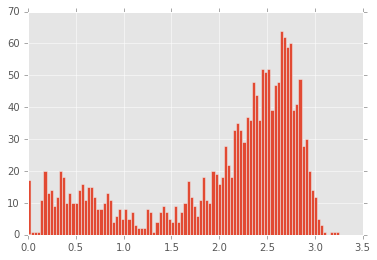

In [57]:
# plot
cc = plt.hist(pan['pes'],100)

In [58]:
# each column is a Series type that inherits from numpy array
a = pan['pes']
print('column is type ',type(a),' items are of type ',a.dtype)
#print(a[:10])
ar = a.values # is the numpy array
print('values are of type ',type(ar))

column is type  <class 'pandas.core.series.Series'>  items are of type  float64
values are of type  <type 'numpy.ndarray'>


In [59]:
# we can apply selections to the series
# operators and, or, not (& | ~)
ind = (pan['pes'] > 1.2) & (pan['pes'] < 3.)
print('selection is of type ',type(ind),' items are of type ',ind.dtype)
ind[:4]

selection is of type  <class 'pandas.core.series.Series'>  items are of type  bool


0     True
1     True
2    False
3     True
Name: pes, dtype: bool

 main 16.2884785406 std 0.631851815118


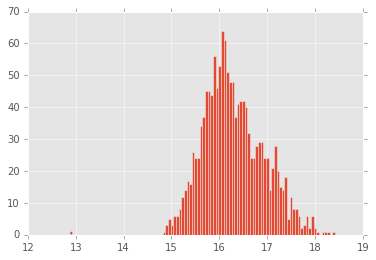

In [60]:
# we can apply that selection to another serie
val = pan['gain'][ind]
cc = plt.hist(val,100)
print(' main {} std {}'.format(np.mean(val),np.std(val)))

 dataframe has now 1409 entries


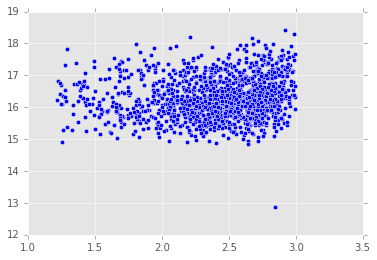

In [61]:
# or to the full dataframe
fpan = pan[['pes','gain']][ind]
print(' dataframe has now {} entries'.format(len(fpan)))
cc = plt.scatter(fpan['pes'],fpan['gain'])

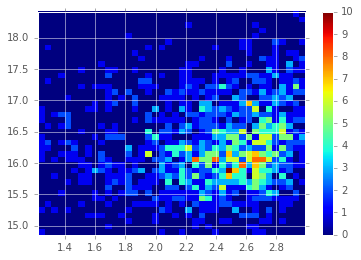

In [62]:
# plotting a 2D histogram
ind = fpan['gain'] > 14
cc = plt.hist2d(fpan['pes'][ind],fpan['gain'][ind],40)
plt.colorbar()

## adding more colums

In [63]:
pan['noise_in_pes'] = pan['noise']/pan['gain']

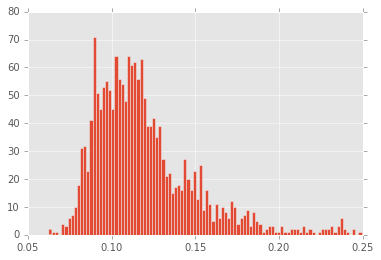

In [64]:
cc = plt.hist(pan['noise_in_pes'][pan['noise_in_pes']<0.25],100)

## saving dataframe

In [65]:
# saving to hdf5 as a table
fpan.to_hdf('data/store.h5','df',mode='w',format='table',data_columns=True)

# savint to csv
fpan.to_csv('data/store.csv')

In [66]:
# getting the panda table back
store = pd.HDFStore('data/store.h5')
fpan2 = store.df
print(' panda read back, len {}'.format(len(fpan2)))
print(' labels ',fpan2.columns)

 panda read back, len 1409
 labels  Index([u'pes', u'gain'], dtype='object')
